# HW1 - Python and Probability

In this module, we will be using what you learned in class about python and probability and practice using the git workflow to submit assignments in this class. 

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
%matplotlib inline
import string

### 1. Create a list of 1000 normally-distributed numbers with mean 10 and variance 5 and assign it to a variable

$$ X \sim N(10, 5) $$

For this, you can use the `scipy.stats.norm` function. You can find the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). Look for the example that tells you how to generate random numbers!

Also, be careful about your `scale` parameter -- remember, you want a *variance* of 5 here. Another thing to watch out here is that we've imported the entire `scipy.stats` module. Keep that in mind when trying to figure out how to access functions within a module.

##### [10] pts

In [4]:
mu = 10 # mean
sigma2 = 5 # variance

# Generate 1000 normally distributed random variabes with these parameters
# norm_list = stats.norm.rvs(loc=mu,scale=np.sqrt(sigma2),size=1000)
norm_list = np.sqrt(sigma2)*stats.norm.rvs(size=1000) + mu

norm_list[:100] # print the first 100 random variables

array([10.65907203, 12.17815659,  8.97684761,  8.53468776, 11.09628798,
        7.21092137,  9.59063494,  9.28336953, 12.90220418, 10.89536453,
        5.72002546,  8.01915894,  7.2882102 , 11.12020086, 11.18252375,
       10.02116747,  8.52704671, 11.46556654,  6.45355944, 10.47402975,
       11.45133624, 11.54201529,  3.56546959, 10.11021038,  8.67813421,
        8.90462527, 12.32988587,  8.56357829, 10.47910465, 11.82553861,
        7.95302588, 10.91747902,  7.97876602,  8.23673687, 12.78934736,
        9.33974344,  8.05519553, 10.31639967, 12.24870671, 12.01604741,
       11.53009726, 10.69625349, 11.16765013,  9.53006857,  8.91885439,
       10.10429716, 10.11034765, 11.19027579, 10.40871315,  9.34161764,
        4.9798712 , 11.66060137,  9.33469686,  9.48009902,  7.32966617,
       11.89724538,  9.26266729, 12.22177424,  7.89475781,  9.99421129,
       13.07608971, 10.22276719, 13.25284468,  8.03424524,  8.64215488,
       10.62724423,  7.84296854,  8.06812528,  9.6615822 ,  8.17

### 2. Check the *empirical* mean and variance of this distribution by using the `mean` and `std` functions from the `numpy` library on your list.

##### [5] pts

In [26]:
## Mean:
print(norm_list.mean())

10.055876063391436


##### [5] pts

In [28]:
## Variance:
print(norm_list.var())

5.354984706916299


### 3. The Multivariate Normal

For this step, we're going to emulate draws from a bivariate normal distribution (a 2-dimensional normal distribution). As you remember from class, the multivariate normal distribution can be expressed by a mean vector and a covariance matrix. However, we can also build our *own* bivariate normal by generating correlated values to the values that you generated above.

The random normal values that you generated before were distributed

$$X \sim N(10, 5)$$ 
(This notation means the random variable X is distributed Normally with mean 10, and variance 5)

Let's say that we want to generate another set of 1000 Normal random variables. However, we want them to be *correlated* with your current list. At the end, we would like the *joint* distribution of the two lists to have some non-zero *covariance*. To read more about the difference between a correlation and a covariance, click [here](http://ci.columbia.edu/ci/premba_test/c0331/s7/s7_5.html)

At the end, we would like the *joint* distribution of the two lists to follow the following:

$$ \begin{bmatrix}X\\Y\end{bmatrix} \sim N(\begin{bmatrix}10 \\50 \end{bmatrix}, \begin{bmatrix}  5&8\\8&20\end{bmatrix})$$

which follows the following structure:

$$ \begin{bmatrix}X\\Y\end{bmatrix} \sim N(\begin{bmatrix} \mu_x \\ \mu_y \end{bmatrix}, \begin{bmatrix} \sigma_x^2 & \rho\sigma_x\sigma_y \\ \rho\sigma_y\sigma_x & \sigma_y^2 \end{bmatrix})$$

The diagonals of the covariance matrix are the respective variances of the two normal distributions that make up the bivariate normal. The diagonal elements represent the covariance between the two (this generalizes in *k* dimensions).

The covariance in this case is 8. However, we will need to convert this to a correlation for later. The relationship between the covariance and the correlation is given as follows:

$$ Cov_{xy} = \rho_{xy}\sigma_x\sigma_y $$

where $\rho_{xy}$ is the correlation between $x$ and $y$

##### [5] pts

In [6]:
cov = 8. # covariance of x, y
mu_x = 10. # mean of x
mu_y = 50. # mean of y
sigma2_x = 5. # variance of x
sigma2_y = 20. # variance of y

# Compute the correlation of x, y
rho = cov/np.sqrt(sigma2_x*sigma2_y)
print(rho)


0.8


We now want to generate a new set of 1000 normally distributed variables. However, we want to generate them based on the values of our old list. For each number $x$ generated in your old list, generate a new number which is drawn from the following distribution:

$$ y \sim N((\mu_y + \rho(\frac{\sigma_y}{\sigma_x})(x-\mu_x)), \sigma^2_y (1-\rho^2)) $$

where $\rho$ is the *correlation* between the two normal distributions that you calculated above, $\mu_y$ is the mean of Y, and $\sigma$ represents the standard deviation. Store the results in another list of 1000 numbers. We will do this in two different ways: Please complete the boilerplate code below

#### Method 1 -- build a list iteratively [10 pts]

In [7]:
## This first method will involve constructing 
## an array iteratively using a for loop:

cond_normal_array1 = []
for v in norm_list:
    """
    Compute a new number depending on the value in normlist
    and append it to cond_normal_array1
    """    
    # Predict y using a equation above and stats.norm.rvs:
    mu_y_pred = rho*np.sqrt(sigma2_y/sigma2_x)*(v - mu_x) + mu_y
    sigma2_y_pred = sigma2_y*(1.-rho**2)
    y = stats.norm.rvs(loc=mu_y_pred,scale=np.sqrt(sigma2_y_pred),size=1)
    
    # Alternatively, predict y directly, using this formula:
    # This implementation has the same mean and standard deviation
    # y = np.sign(rho)*(np.sqrt(sigma2_y*sigma2_x))*(v - mu_x) + mu_y

    cond_normal_array1.append(y)

Verify that the mean and variance of the numbers that you generated match the expected distribution of $Y$

In [8]:
# Find the mean
print(np.mean(cond_normal_array1))

49.94271389943616


In [9]:
# And variance
print(np.var(cond_normal_array1))

18.11053125747494


#### Method 2 - List Comprehension [10 pts]

This method will involve writing a function that operates on a single value, and then we will apply that in a list comprehension to generate the new list


In [10]:
def gen_cond_normal_val(x, y_mean, x_mean, y_std, x_std, rho):
    """
    This function returns a draw from a conditional normal distribution with the specified parameters
    Args: (all Args numeric)
        x: Observed value
        y_mean: mean of Y distribution
        x_mean: mean of X distribution
        y_std: standard deviation of Y distribution
        x_std: standard deviation of X distribution
        rho: correlation between X and Y
    Returns: 
        
    """
    return np.sign(rho)*(y_std/x_std)*(x - x_mean) + y_mean


In [12]:
cond_normal_array2 = [ gen_cond_normal_val(x,mu_y,mu_x,np.sqrt(sigma2_y),np.sqrt(sigma2_x),rho) for x in norm_list]

# Find the mean
print(np.mean(cond_normal_array2))

# and the variance
print(np.var(cond_normal_array2))


49.92685110898456
20.59731213827032


### 4. Strings and Discrete Distributions

In this section, we will use strings and dictionaries to create a draw from a discrete distribution. 

First, take the following string and perform the following operations and save it back to the same variable:

 1. Remove all whitespace (spaces)
 2. Remove all periods `.` and commas `,`
 3. Make every letter lowercase
 

##### [5] pts

In [10]:
lorem_string = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."
print(lorem_string)


Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.


In [12]:
# Perform the operations listed above and save it back to lorem_string
lorem_string = lorem_string.replace(' ','').replace('.','').replace(',','').lower()
print(lorem_string)


loremipsumdolorsitametconsecteturadipiscingelitseddoeiusmodtemporincididuntutlaboreetdoloremagnaaliquautenimadminimveniamquisnostrudexercitationullamcolaborisnisiutaliquipexeacommodoconsequatduisauteiruredolorinreprehenderitinvoluptatevelitessecillumdoloreeufugiatnullapariaturexcepteursintoccaecatcupidatatnonproidentsuntinculpaquiofficiadeseruntmollitanimidestlaborum


Next, create a dictionary where the `keys` are each of the letters of the english alphabet and the `values` are the number of times it appears in the following string. Assign this to a variable called `result_dict`:

##### [10 pts]

In [13]:
# Your code here:
result_dict = { s:lorem_string.count(s) for s in string.ascii_lowercase }
result_dict

{'a': 29,
 'b': 3,
 'c': 16,
 'd': 19,
 'e': 38,
 'f': 3,
 'g': 3,
 'h': 1,
 'i': 42,
 'j': 0,
 'k': 0,
 'l': 22,
 'm': 17,
 'n': 24,
 'o': 29,
 'p': 11,
 'q': 5,
 'r': 22,
 's': 18,
 't': 32,
 'u': 29,
 'v': 3,
 'w': 0,
 'x': 3,
 'y': 0,
 'z': 0}

if you did everything correctly, this should output a plot!

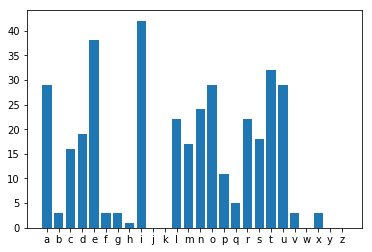

In [14]:
# Run this line to plot the counts
plt.bar(list(result_dict.keys()), list(result_dict.values()))
plt.show()

Next, we're going to create a discrete distribution from what you saw in `result_dict`. We will take the counts of values as you observed as defining the distribution. In order to make it look more like a distribution, we need to *normalize* the counts. Recall that probability distributions must sum up to 1. So, we need to make the values in `result_dict` sum up to 1, but to keep the ratio between each of the values. To do this, simply divide every element by the sum of all of the elements. Return this new dictionary as `normalized_dict`

##### [10] pts

In [15]:
# Your code here
dict_sum = float(sum(result_dict.values()))
normalized_dict = { s:result_dict[s]/dict_sum for s in result_dict.keys() }
normalized_dict

{'a': 0.07859078590785908,
 'b': 0.008130081300813009,
 'c': 0.04336043360433604,
 'd': 0.051490514905149054,
 'e': 0.10298102981029811,
 'f': 0.008130081300813009,
 'g': 0.008130081300813009,
 'h': 0.0027100271002710027,
 'i': 0.11382113821138211,
 'j': 0.0,
 'k': 0.0,
 'l': 0.05962059620596206,
 'm': 0.04607046070460705,
 'n': 0.06504065040650407,
 'o': 0.07859078590785908,
 'p': 0.02981029810298103,
 'q': 0.013550135501355014,
 'r': 0.05962059620596206,
 's': 0.04878048780487805,
 't': 0.08672086720867209,
 'u': 0.07859078590785908,
 'v': 0.008130081300813009,
 'w': 0.0,
 'x': 0.008130081300813009,
 'y': 0.0,
 'z': 0.0}

Next, recall that a Random Variable is a function that maps events from the sample space (here, this is the letters) to real numbers. We're going to define a random variable $X$ that takes on the values as defined by the following dictionary (any letter which does not show up in our `normalized_dict` you can ignore.

In [16]:
letter_dict = dict(zip(string.ascii_lowercase, range(1, len(string.ascii_lowercase)+1)))
letter_dict

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

Assume that the probabilities that you see in `normalized_dict` are the result of evaluating a probability mass function for drawing letters. Each of the letter draws is now represented by a number according to `letter_dict`. Using this information, compute the Expected Value of the distribution. In addition, write code the implements both forms of the variance formula below and verify that they are indeed equivalent.
$$ E(X) = \sum_ix_iP(x_i) $$
$$ Var(X) = \sum_i(x_i-E(X))^2P(x_i)$$
$$ or $$
$$Var(X)= E(X^2) - E(X)^2 $$

##### [10] pts each

In [19]:
# Expectation - Your code here
expectation_x = sum( [ letter_dict[x]*normalized_dict[x] for x in string.ascii_lowercase] )
expectation_x

11.96747967479675

In [20]:
# Variance Equation # 1 - Your code here
variance1 = sum( [ normalized_dict[x]*(letter_dict[x] - expectation_x)**2 for x in string.ascii_lowercase] )
variance1


44.00436248264921

In [21]:
# Variance Equation # 2 - Your code here
expectation_x_squared = sum( [ (letter_dict[x]**2)*normalized_dict[x] for x in string.ascii_lowercase] )
variance2 = expectation_x_squared - expectation_x**2
variance2


44.004362482649185